<a href="https://colab.research.google.com/github/Domteto/AIDL-BVC/blob/main/CvBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
train_ttkn = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\Eso\Documents\TTKN AIDL A1\CarvsBike\Train",
    labels='inferred', # class bikes will be assigned 0 and class cars will be assigned 1; in this case, bikes label is 0 and cars label is 1
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing the images to a size uniformly  -- original dataset are of diff size
)

Found 3482 files belonging to 2 classes.


In [4]:
testing_ttkn = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\Eso\Documents\TTKN AIDL A1\CarvsBike\Test",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 497 files belonging to 2 classes.


In [5]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [6]:
train_ttkn = train_ttkn.map(process)
testing_ttkn = testing_ttkn.map(process)

In [7]:
BikeVsCarmodel = Sequential()

In [8]:
BikeVsCarmodel.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
BikeVsCarmodel.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
BikeVsCarmodel.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
BikeVsCarmodel.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
BikeVsCarmodel.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
BikeVsCarmodel.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
BikeVsCarmodel.add(Flatten())
BikeVsCarmodel.add(Dense(128, activation='relu'))
BikeVsCarmodel.add(Dropout(0.1))  # added to reduce overfitting
BikeVsCarmodel.add(Dense(64, activation='relu'))
BikeVsCarmodel.add(Dropout(0.1))  # added to reduce overfitting
BikeVsCarmodel.add(Dense(1, activation='sigmoid'))  #output layer
BikeVsCarmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
BikeVsCarmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = BikeVsCarmodel.fit(train_ttkn, epochs=10, validation_data=testing_ttkn)

Epoch 1/10
109/109 [==============================] - 70s 629ms/step - loss: 0.5241 - accuracy: 0.7570 - val_loss: 0.2296 - val_accuracy: 0.9074
Epoch 2/10
109/109 [==============================] - 69s 627ms/step - loss: 0.2022 - accuracy: 0.9176 - val_loss: 0.1279 - val_accuracy: 0.9517
Epoch 3/10
109/109 [==============================] - 70s 636ms/step - loss: 0.1229 - accuracy: 0.9529 - val_loss: 0.0861 - val_accuracy: 0.9678
Epoch 4/10
109/109 [==============================] - 69s 628ms/step - loss: 0.0804 - accuracy: 0.9687 - val_loss: 0.0721 - val_accuracy: 0.9678
Epoch 5/10
109/109 [==============================] - 69s 629ms/step - loss: 0.0505 - accuracy: 0.9808 - val_loss: 0.0322 - val_accuracy: 0.9879
Epoch 6/10
109/109 [==============================] - 69s 628ms/step - loss: 0.0374 - accuracy: 0.9868 - val_loss: 0.0628 - val_accuracy: 0.9859
Epoch 7/10
109/109 [==============================] - 69s 629ms/step - loss: 0.0314 - accuracy: 0.9871 - val_loss: 0.0210 - val_ac

In [10]:
import matplotlib.pyplot as plt

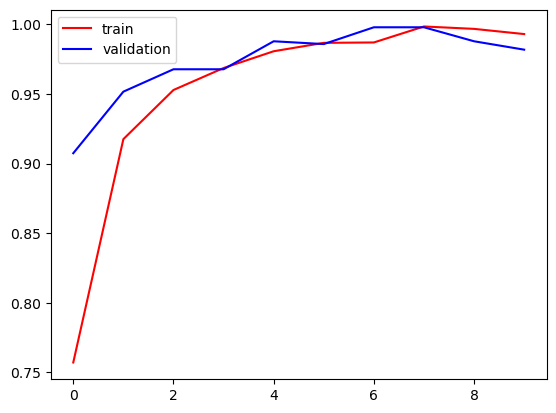

In [11]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

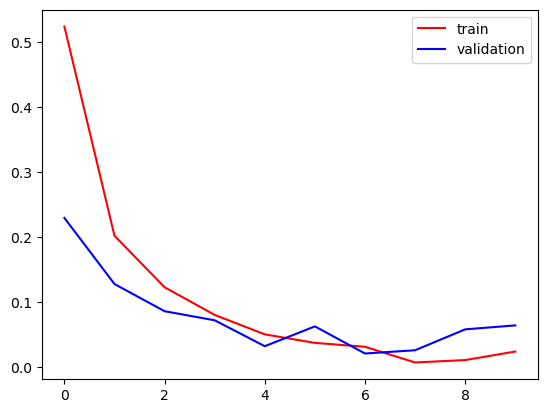

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 0s 124ms/step


array([[0.]], dtype=float32)

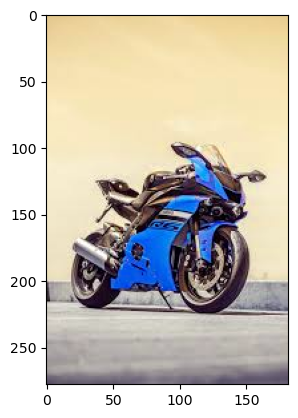

In [13]:
import cv2  # open cv library
test_img_B0 = cv2.imread(r'C:\Users\Eso\Documents\TTKN AIDL A1\CarvsBike\Test\bikes\Bike (138).jpeg')

plt.imshow(test_img_B0)

test_img_B0.shape

test_img_B0 = cv2.resize(test_img_B0, (256, 256))  #size 256 * 256

test_img_input = test_img_B0.reshape((1, 256, 256, 3))
BikeVsCarmodel.predict(test_img_input)  # 0 refering to bike and 1 refering to car


1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)

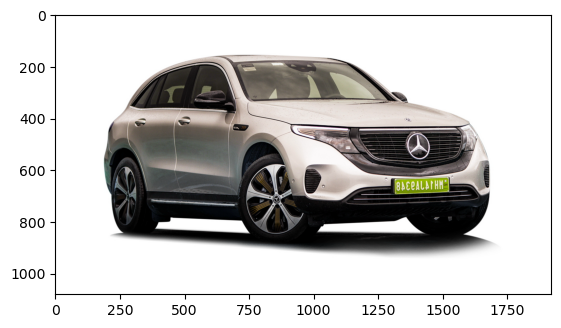

In [14]:

test_img2_C1 = cv2.imread(r'C:\Users\Eso\Documents\TTKN AIDL A1\CarvsBike\Test\cars\Car (1008).jpeg')
#print(test_img2)
plt.imshow(test_img2_C1)

test_img2_C1= cv2.resize(test_img2_C1, (256, 256))

test_img_input = test_img2_C1.reshape((1, 256, 256, 3))

BikeVsCarmodel.predict(test_img_input)  # 0 = bike and 1 = car

In [15]:

from sklearn.metrics import precision_score, recall_score, f1_score
# Compute predictions for the validation dataset
validation_preds = BikeVsCarmodel.predict(testing_ttkn)
validation_preds = (validation_preds > 0.5).astype(int)

# Get ground truth labels for the validation dataset
validation_labels = []
for _, label in testing_ttkn.unbatch():
    validation_labels.append(label.numpy())

# Compute precision, recall, and F1-score
precision = precision_score(validation_labels, validation_preds)
recall = recall_score(validation_labels, validation_preds)
f1score = f1_score(validation_labels, validation_preds)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)

# Evaluate the model on the validation dataset
evaluation = BikeVsCarmodel.evaluate(testing_ttkn)
loss = evaluation[0]
accuracy = evaluation[1]

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

16/16 [==============================] - 3s 139ms/step
Precision: 0.5311203319502075
Recall: 0.512
F1-score: 0.5213849287169043
16/16 [==============================] - 3s 150ms/step - loss: 0.0643 - accuracy: 0.9819
Validation Loss: 0.06425761431455612
Validation Accuracy: 0.9818913340568542
